In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [43]:
ds=pd.read_csv('/Users/apple/Desktop/perceptron/datasets/titanic.csv')
ds.describe()
ds_test=pd.read_csv('/Users/apple/Desktop/perceptron/datasets/titanictest.csv')

In [93]:
print ds_test.shape
print ds_test

(418, 11)
     PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903       1                  

In [69]:
mean_Age = ds['Age'].mean()
mean_Age_test = ds_test['Age'].mean()

ds['Age'] = ds['Age'].fillna(int(mean_Age))
ds_test['Age'] = ds_test['Age'].fillna(int(mean_Age_test))
ds_test['Fare'] = ds_test['Fare'].fillna(int(ds_test['Fare'].mean()))



sex_mapping = {
    'male': 0,
    'female': 1
}

sex = ds['Sex'].values
sex_test = ds_test['Sex'].values
print sex.shape
print sex_test.shape

quant_sex = np.zeros(sex.shape)
quant_sex_test = np.zeros(sex_test.shape)

for ix in range(quant_sex.shape[0]):
    quant_sex[ix] = sex_mapping[sex[ix]]
# print quant_sex

for ix in range(quant_sex_test.shape[0]):
    quant_sex_test[ix] = sex_mapping[sex_test[ix]]

(891,)
(418,)


In [54]:
data = np.asarray([ds['Age'], ds['Pclass'], ds['SibSp'],
        ds['Parch'], ds['Fare'], quant_sex,
        ds['Survived']]).astype("float").T
Y = ds['Survived'].values
cols = ['Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex', 'Survived']
print data[0]
# ds.head(n=1)

[ 22.     3.     1.     0.     7.25   0.     0.  ]


In [72]:
data_test = np.asarray([ds_test['Age'], ds_test['Pclass'], ds_test['SibSp'],
        ds_test['Parch'], ds_test['Fare'], quant_sex_test]).astype("float").T
cols = ['Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex']
print data_test.shape
print data_test
# ds.head(n=1


(418, 6)
[[ 34.5      3.       0.       0.       7.8292   0.    ]
 [ 47.       3.       1.       0.       7.       1.    ]
 [ 62.       2.       0.       0.       9.6875   0.    ]
 ..., 
 [ 38.5      3.       0.       0.       7.25     0.    ]
 [ 30.       3.       0.       0.       8.05     0.    ]
 [ 30.       3.       1.       1.      22.3583   0.    ]]


In [155]:
split=int(0.85*data.shape[0])
print data.shape
print split

x_test=data[split:,:6]
x_train=data[:split,:6]
y_train=Y[:split]
y_test=Y[split:]
print x_test.shape,x_train.shape
print y_test.shape,y_train.shape

(891, 7)
757
(134, 6) (757, 6)
(134,) (757,)


In [156]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [157]:
arr2=[]
for ix in range(1,40):
    dt=DecisionTreeClassifier(max_depth=ix)
    dt.fit(x_train,y_train)
    arr2.append(dt.score(x_test,y_test))


In [127]:
from sklearn.ensemble import AdaBoostClassifier
clf=AdaBoostClassifier(RandomForestClassifier(n_estimators=30))
clf.fit(x_train, y_train)
print clf.score(x_test,y_test)

0.815642458101


In [159]:
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(x_train,y_train)
dt.score(x_test,y_test)
print data_test.shape
print x_test.shape,x_train.shape
pred= dt.predict(data_test)


(418, 6)
(134, 6) (757, 6)


In [160]:
pred2= pd.DataFrame({'PassengerId':ds_test['PassengerId'],'Survived':pred})
#print pred2
pred2.to_csv('titanic_res.csv',header=True, columns=['PassengerId','Survived'],sep=',',index=False)
pd.read_csv('./titanic_res.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [146]:
print pred


[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 1 0 1 1 0 1 0 0 0]


In [ ]:
np.savetxt('titanic_results.csv', pred, delimiter=',', header='survival') 

[0.79850746268656714, 0.79850746268656714, 0.83582089552238803, 0.86567164179104472, 0.87313432835820892, 0.86567164179104472, 0.85820895522388063, 0.85820895522388063, 0.85820895522388063, 0.86567164179104472, 0.85074626865671643, 0.84328358208955223, 0.83582089552238803, 0.82089552238805974, 0.83582089552238803, 0.80597014925373134, 0.83582089552238803, 0.80597014925373134, 0.80597014925373134, 0.82835820895522383, 0.84328358208955223, 0.82089552238805974, 0.81343283582089554, 0.83582089552238803, 0.82089552238805974, 0.82089552238805974, 0.81343283582089554, 0.82089552238805974, 0.82835820895522383, 0.83582089552238803, 0.80597014925373134, 0.82089552238805974, 0.80597014925373134, 0.83582089552238803, 0.79104477611940294, 0.82835820895522383, 0.81343283582089554, 0.80597014925373134, 0.82835820895522383]
0.873134328358


<function matplotlib.pyplot.show>

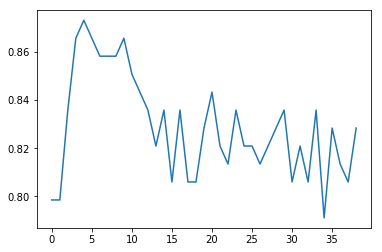

In [158]:
print arr2
print max(arr2)
plt.plot(arr2)
plt.show